In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from census import Census
from api_keys_SL import census_api_key


In [2]:
# Get census Data using census API 

def json_to_dataframe(response):
    return pd.DataFrame(response.json()[1:],columns=response.json()[0])
url_2017 = "https://api.census.gov/data/2017/acs/acs1?get=NAME,B01003_001E,B06011_001E,B23025_005E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E&for=county:453,491,021,209&in=state:48"
url_2019 = "https://api.census.gov/data/2019/acs/acs1?get=NAME,B01003_001E,B06011_001E,B23025_005E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E&for=county:453,491,021,209&in=state:48"
url_2021 = "https://api.census.gov/data/2021/acs/acs1?get=NAME,B01003_001E,B06011_001E,B23025_005E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_006E,B02001_007E,B02001_008E&for=county:453,491,021,209&in=state:48"

response=requests.request("GET",url_2017)
response1=requests.request("GET",url_2019)
response2=requests.request("GET",url_2021)


In [3]:
# Save to a dataframe
census_2017_df = pd.DataFrame(json_to_dataframe(response))
census_2019_df = pd.DataFrame(json_to_dataframe(response1))
census_2021_df = pd.DataFrame(json_to_dataframe(response2))

# drop redundant columns
census_2017_df = census_2017_df.drop(['state', 'county'], axis=1)
census_2019_df = census_2019_df.drop(['state', 'county'], axis=1)
census_2021_df = census_2021_df.drop(['state', 'county'], axis=1)
   

In [4]:
# Rename columns
census_2017_df = census_2017_df.rename(
    columns={
      "B01003_001E": "Population 2017",
      "B06011_001E": "Median Income 2017",
      "B23025_005E": "Unemployed for ages>=16 2017",
      "B02001_002E": "Race: White 2017",
      "B02001_003E": "Race: Black or African American 2017",
      "B02001_004E": "Race: Native American 2017",
      "B02001_005E": "Race: Asian 2017",
      "B02001_006E": "Race: Pacific Islander 2017",
      "B02001_007E": "Race: Other 2017",
      "B02001_008E": "Race: Two or more races 2017",
      "NAME": "Name"      
    }
   )
census_2019_df = census_2019_df.rename(
    columns={
      "B01003_001E": "Population 2019",
      "B06011_001E": "Median Income 2019",
      "B23025_005E": "Unemployed for ages>=16 2019",
      "B02001_002E": "Race: White 2019",
      "B02001_003E": "Race: Black or African American 2019",
      "B02001_004E": "Race: Native American 2019",
      "B02001_005E": "Race: Asian 2019",
      "B02001_006E": "Race: Pacific Islander 2019",
      "B02001_007E": "Race: Other 2019",
      "B02001_008E": "Race: Two or more races 2019",
      "NAME": "Name"      
    }
   )
census_2021_df = census_2021_df.rename(
    columns={
      "B01003_001E": "Population 2021",
      "B06011_001E": "Median Income 2021",
      "B23025_005E": "Unemployed for ages>=16 2021",
      "B02001_002E": "Race: White 2021",
      "B02001_003E": "Race: Black or African American 2021",
      "B02001_004E": "Race: Native American 2021",
      "B02001_005E": "Race: Asian 2021",
      "B02001_006E": "Race: Pacific Islander 2021",
      "B02001_007E": "Race: Other 2021",
      "B02001_008E": "Race: Two or more races 2021",
      "NAME": "Name"      
    }
   )


census_2021_df.head()

,Name,Population 2021,Median Income 2021,Unemployed for ages>=16 2021,Race: White 2021,Race: Black or African American 2021,Race: Native American 2021,Race: Asian 2021,Race: Pacific Islander 2021,Race: Other 2021,Race: Two or more races 2021
0,"Travis County, Texas",1305154,46868,38913,717362,102957,15976,100325,367,119005,249162
1,"Williamson County, Texas",643026,46379,17071,387893,42188,3828,54119,399,47729,106870
2,"Bastrop County, Texas",102058,37132,3045,58879,4262,1576,3140,0,13441,20760
3,"Hays County, Texas",255397,33453,5774,149132,8401,2074,5029,1258,12138,77365


In [12]:
# Merge DataFrames
census_combined_df = pd.merge(census_2017_df, census_2019_df, how="inner", on=['Name'])
census_combined_df = pd.merge(census_combined_df, census_2021_df, how="inner", on=['Name'])
census_combined_df.set_index('Name', inplace=True)
census_combined_df.head()


,Population 2017,Median Income 2017,Unemployed for ages>=16 2017,Race: White 2017,Race: Black or African American 2017,Race: Native American 2017,Race: Asian 2017,Race: Pacific Islander 2017,Race: Other 2017,Race: Two or more races 2017,...,Population 2021,Median Income 2021,Unemployed for ages>=16 2021,Race: White 2021,Race: Black or African American 2021,Race: Native American 2021,Race: Asian 2021,Race: Pacific Islander 2021,Race: Other 2021,Race: Two or more races 2021
Name,,,,,,,,,,,,,,,,,,,,,
"Travis County, Texas",1226698,38480,24416,866322,101281,7940,82866,244,124347,43698,...,1305154,46868,38913,717362,102957,15976,100325,367,119005,249162
"Hays County, Texas",214485,31877,5797,187859,9325,1137,3218,123,6495,6328,...,255397,33453,5774,149132,8401,2074,5029,1258,12138,77365
"Williamson County, Texas",547545,37495,10561,435271,32555,1333,35988,204,16467,25727,...,643026,46379,17071,387893,42188,3828,54119,399,47729,106870
"Bastrop County, Texas",84761,30819,1030,60565,7170,295,648,0,14870,1213,...,102058,37132,3045,58879,4262,1576,3140,0,13441,20760


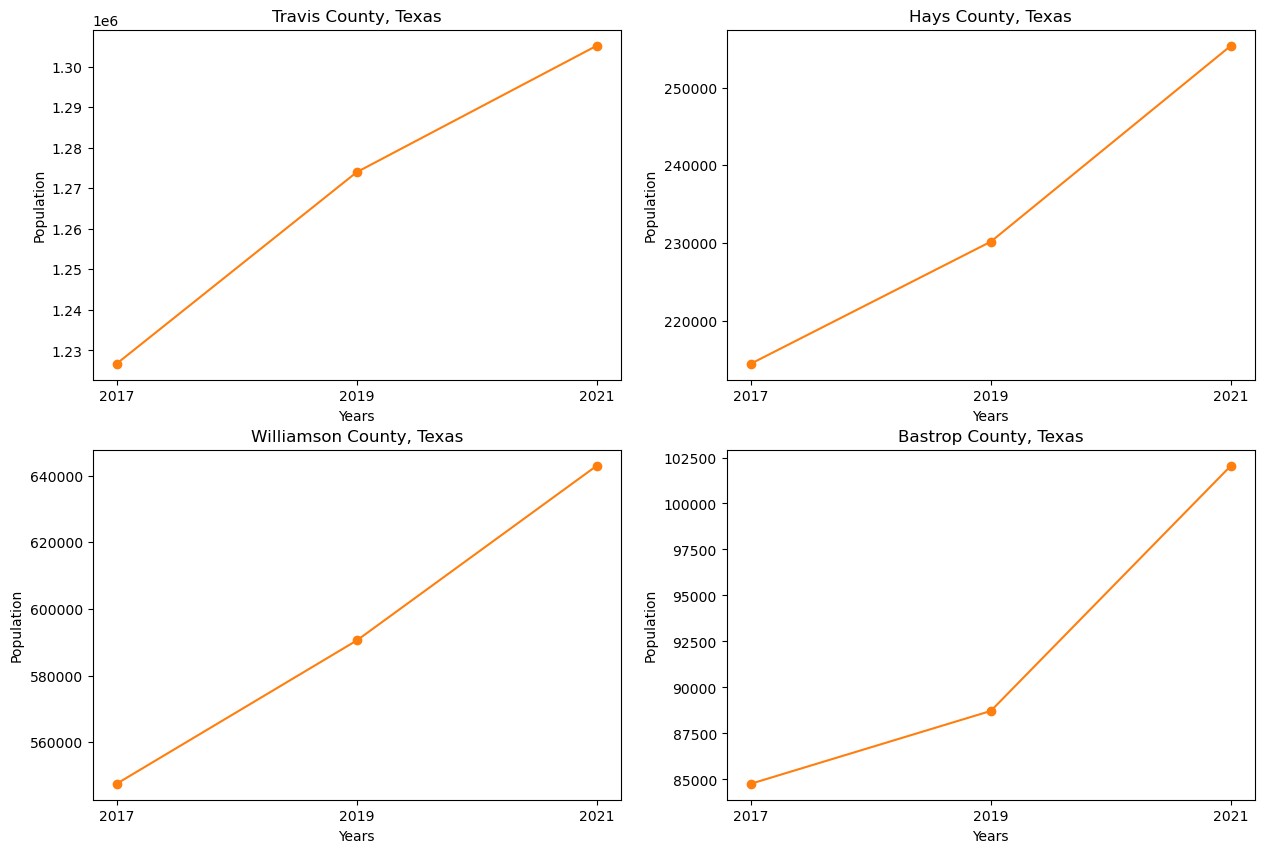

In [52]:
# Create Population Dataframe 
population_df  = census_combined_df[['Population 2017','Population 2019','Population 2021']].copy()


# Create 1 figure containing a scatterplot with regression lines for each county vs years

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
# Set the x values equal to the years
x = ['2017', '2019', '2021']
# Set the y values equal to the populations for each county 
y1 = population_df.loc['Travis County, Texas'].astype(int).tolist()
y2 = population_df.loc['Hays County, Texas'].astype(int).tolist()
y3 = population_df.loc['Williamson County, Texas'].astype(int).tolist()
y4 = population_df.loc['Bastrop County, Texas'].astype(int).tolist()

# Plot a graph for each county
axs[0,0].plot(x, y1, color ='tab:orange',marker = 'o')
axs[0,1].plot(x, y2, color ='tab:orange',marker = 'o')
axs[1,0].plot(x, y3,  color ='tab:orange',marker = 'o')
axs[1,1].plot(x, y4,  color ='tab:orange',marker = 'o')

# Set the labels and titles for each graph
axs[0,0].set_title('Travis County, Texas')
axs[0,0].set_xlabel('Years')
axs[0,0].set_ylabel('Population')

axs[0,1].set_title('Hays County, Texas')
axs[0,1].set_xlabel('Years')
axs[0,1].set_ylabel('Population')

axs[1,0].set_title('Williamson County, Texas')
axs[1,0].set_xlabel('Years')
axs[1,0].set_ylabel('Population')

axs[1,1].set_title('Bastrop County, Texas')
axs[1,1].set_xlabel('Years')
axs[1,1].set_ylabel('Population')

plt.show() 


In [7]:
# Create Median Income Dataframe 
median_income_df  = census_combined_df[['Median Income 2017','Median Income 2019','Median Income 2021']].copy().T
median_income_df.head()

,0,1,2,3
Median Income 2017,38480,31877,37495,30819
Median Income 2019,41868,31769,40406,24706
Median Income 2021,46868,33453,46379,37132


In [8]:
# Create Race  Dataframe 
race_df  = census_combined_df[['Race: White 2017','Race: White 2019','Race: White 2021',
                    'Race: Black or African American 2017','Race: Black or African American 2019','Race: Black or African American 2021',
                    'Race: Native American 2017','Race: Native American 2019','Race: Native American 2021',
                    'Race: Asian 2017','Race: Asian 2019','Race: Asian 2021',
                    'Race: Pacific Islander 2017','Race: Pacific Islander 2019','Race: Pacific Islander 2021',
                    'Race: Other 2017','Race: Other 2019','Race: Other 2021',
                    'Race: Two or more races 2017','Race: Two or more races 2019','Race: Two or more races 2021'
                   ]].copy().T
race_df

,0,1,2,3
Race: White 2017,866322,187859,435271,60565
Race: White 2019,920247,204010,469151,57372
Race: White 2021,717362,149132,387893,58879
Race: Black or African American 2017,101281,9325,32555,7170
Race: Black or African American 2019,104062,9776,40399,5334
Race: Black or African American 2021,102957,8401,42188,4262
Race: Native American 2017,7940,1137,1333,295
Race: Native American 2019,9660,1422,2577,857
Race: Native American 2021,15976,2074,3828,1576
Race: Asian 2017,82866,3218,35988,648
